In [8]:
import numpy as np
import h5py
import matplotlib
from matplotlib import pyplot as plt
import fastmri
from fastmri.data import transforms as T
import sys
sys.path.append('../')
from utils.common_fcns import *

In [3]:
def combine_all_coils(volume_kspace,slice_idx):
    slice_kspace = volume_kspace[slice_idx]
    slice_kspace2 = T.to_tensor(slice_kspace)      # Convert from numpy array to pytorch tensor
    slice_image = fastmri.ifft2c(slice_kspace2)           # Apply Inverse Fourier Transform to get the complex image
    slice_image_abs = fastmri.complex_abs(slice_image)   # Compute absolute value to get a real image
    slice_image_rss = fastmri.rss(slice_image_abs, dim=0)
    return slice_image_rss.numpy()

In [39]:
def resize_scan(X):
    # Raw image is a rectangle, crop to be square
    y_min = int((768-396)/2)
    y_max = int((768-396)/2+396)
    X_square = X[y_min:y_max,:]
    # Crop further to zone of interest to get a 256x256 image
    X_square_256 = X_square[50:50+256,70:70+256]
    return X_square_256
    

In [4]:
# Load a scan in
data_dir = '../data/multicoil_test/'
file = data_dir+'file_brain_AXT2_200_2000482.h5'
hf = h5py.File(file)
volume_kspace = hf['kspace'][()]
n_slices = volume_kspace.shape[0]
print('Number of Slices for this file: '+str(n_slices))

Number of Slices for this file: 16


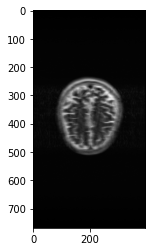

In [40]:
# Pick a slice
X_raw = combine_all_coils(volume_kspace,8)
plt.imshow(np.abs(X_raw), cmap='gray')

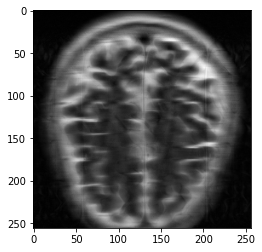

In [41]:
# Resize X for processing
X = resize_scan(X_raw)
plt.imshow(np.abs(X), cmap='gray')

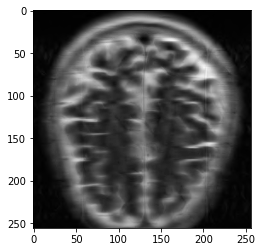

In [42]:
# k-encode
X_encode = k_encode(10000,X)
X_reconstruct = decode(X_encode)
plt.imshow(np.abs(X_reconstruct), cmap='gray')